# 1. 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2. 필요한 데이터 로드

In [2]:
# 리그 오브 레전드 챔피언 데이터

champs = pd.read_csv("../data/champs.csv")
champs.head()

,name,id
0,Jax,24
1,Sona,37
2,Tristana,18
3,Varus,110
4,Fiora,114


In [3]:
# 리그 오브 레전드 매치 정보 데이터

matches = pd.read_csv("../data/matches.csv")
matches.head()

,id,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675


In [4]:
# 리그 오브 레전드 참여자 데이터

participants = pd.read_csv("../data/participants.csv")
participants.head()

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID


In [5]:
# 리그 오브 레전드 각 플레이어 데이터 1

stats1 = pd.read_csv("../data/stats1.csv")
stats1.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [6]:
# 리그 오브 레전드 각 플레이어 데이터 2

stats2 = pd.read_csv("../data/stats1.csv")
stats2.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [7]:
# 리그 오브 레전드 매치 밴 데이터

teambans = pd.read_csv("../data/teambans.csv")
teambans.head()

,matchid,teamid,championid,banturn
0,10,100,11,1
1,10,100,117,3
2,10,100,120,5
3,10,200,84,2
4,10,200,201,4


In [8]:
# 리그 오브 레전드 매치 팀별 데이터

teamstats = pd.read_csv("../data/teamstats.csv")
teamstats.head()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,100,0,1,0,0,0,0,5,0,0,0,0
1,10,200,1,0,1,1,1,1,10,3,1,3,1
2,11,100,1,0,0,0,0,0,2,0,0,0,0
3,11,200,0,1,1,0,1,0,10,3,0,2,0
4,12,100,1,0,0,0,0,0,1,0,0,0,0


In [9]:
# 각 플레이어 데이터의 shape

print(stats1.shape, stats2.shape)
stats = stats1.append(stats2)
print(stats.shape)

(999999, 56) (999999, 56)
(1999998, 56)


In [10]:
stats.columns

Index(['id', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood'],
      dtype='object')

# 3. 데이터 가공

### 3-1 야스오가 포함된 게임 추출

In [11]:
print(participants.shape, stats.shape)

(1834520, 8) (1999998, 56)


In [12]:
# 야스오의 챔피언 id

champs[champs['name'] == 'Yasuo']

,name,id
21,Yasuo,157


In [13]:
# 야스오가 포함된 게임 데이터만 추출

match_yasuo_list = participants[participants['championid'] == 157]['matchid'].tolist()
match_yasuo_list[:5]

[11, 15, 16, 21, 32]

In [14]:
participants_yasuo = participants[participants['matchid'].isin(match_yasuo_list)]
participants_yasuo.shape

(301506, 8)

In [15]:
stats_yasuo = stats[stats['id'].isin(participants_yasuo['id'])]
stats_yasuo.shape

(331480, 56)

### 3-2 테이블 병합

In [16]:
# 각 플레이어 정보와 게임 내 통계량을 병합

yasuo_game_df = pd.merge(participants_yasuo, stats_yasuo, on='id', how='left')

In [17]:
# NaN 값이 포함된 행 제거

yasuo_game_df.dropna(axis=0, inplace=True)
yasuo_game_df.head()

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,19,11,1,115,3,4,DUO_SUPPORT,BOT,0.0,3092.0,...,2.0,2.0,0.0,236.0,12.0,3.0,0.0,14.0,3.0,0.0
1,19,11,1,115,3,4,DUO_SUPPORT,BOT,0.0,3092.0,...,2.0,2.0,0.0,236.0,12.0,3.0,0.0,14.0,3.0,0.0
2,20,11,2,69,4,7,DUO_CARRY,BOT,0.0,3040.0,...,10.0,10.0,0.0,980.0,12.0,1.0,0.0,10.0,2.0,0.0
3,20,11,2,69,4,7,DUO_CARRY,BOT,0.0,3040.0,...,10.0,10.0,0.0,980.0,12.0,1.0,0.0,10.0,2.0,0.0
4,21,11,3,157,14,4,SOLO,MID,0.0,1038.0,...,49.0,25.0,24.0,203.0,13.0,1.0,0.0,7.0,1.0,1.0


In [18]:
# 병합으로 인해 생긴 중복 행 제거

yasuo_game_df.drop_duplicates(inplace=True)
yasuo_game_df.head()

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,19,11,1,115,3,4,DUO_SUPPORT,BOT,0.0,3092.0,...,2.0,2.0,0.0,236.0,12.0,3.0,0.0,14.0,3.0,0.0
2,20,11,2,69,4,7,DUO_CARRY,BOT,0.0,3040.0,...,10.0,10.0,0.0,980.0,12.0,1.0,0.0,10.0,2.0,0.0
4,21,11,3,157,14,4,SOLO,MID,0.0,1038.0,...,49.0,25.0,24.0,203.0,13.0,1.0,0.0,7.0,1.0,1.0
6,22,11,4,4,4,12,SOLO,TOP,0.0,3157.0,...,1.0,0.0,1.0,324.0,16.0,0.0,0.0,9.0,1.0,0.0
8,23,11,5,28,4,11,NONE,JUNGLE,0.0,1402.0,...,70.0,36.0,34.0,564.0,17.0,0.0,0.0,12.0,1.0,0.0


In [19]:
yasuo_game_df.columns, yasuo_game_df.shape

(Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
        'position', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
        'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
        'largestmultikill', 'killingsprees', 'longesttimespentliving',
        'doublekills', 'triplekills', 'quadrakills', 'pentakills',
        'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
        'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
        'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
        'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
        'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
        'goldearned', 'goldspent', 'turretkills', 'inhibkills',
        'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
        'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
        'wardsbought', 'wardsplaced', 'wardskilled', 'firs

In [20]:
# 모든 열의 데이터 확인

yasuo_game_df.iloc[:, :15].head(10)

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,item2,item3,item4,item5,item6
0,19,11,1,115,3,4,DUO_SUPPORT,BOT,0.0,3092.0,2010.0,3158.0,1082.0,3165.0,0.0
2,20,11,2,69,4,7,DUO_CARRY,BOT,0.0,3040.0,3165.0,1056.0,1052.0,0.0,0.0
4,21,11,3,157,14,4,SOLO,MID,0.0,1038.0,1037.0,3087.0,3006.0,1018.0,1042.0
6,22,11,4,4,4,12,SOLO,TOP,0.0,3157.0,3158.0,3027.0,3100.0,1056.0,1058.0
8,23,11,5,28,4,11,NONE,JUNGLE,0.0,1402.0,3100.0,3041.0,3020.0,3089.0,3135.0
10,24,11,6,51,7,4,DUO_CARRY,BOT,1.0,3046.0,3031.0,3085.0,1053.0,3006.0,3133.0
12,25,11,7,62,14,4,SOLO,TOP,1.0,1055.0,3071.0,3142.0,3111.0,3134.0,1037.0
14,26,11,8,134,4,1,SOLO,MID,1.0,3165.0,3020.0,1026.0,3157.0,3285.0,1056.0
16,27,11,9,43,14,4,DUO_SUPPORT,BOT,1.0,3092.0,3165.0,1058.0,3020.0,1026.0,1052.0
18,28,11,10,19,4,11,NONE,JUNGLE,1.0,3748.0,3155.0,3133.0,0.0,1419.0,3111.0


In [21]:
yasuo_game_df.iloc[:, 15:30].head(10)

,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt
0,3340.0,2.0,7.0,5.0,0.0,1.0,0.0,489.0,0.0,0.0,0.0,0.0,0.0,46790.0,41813.0
2,3340.0,2.0,8.0,6.0,0.0,1.0,0.0,338.0,0.0,0.0,0.0,0.0,0.0,62444.0,54560.0
4,3340.0,1.0,7.0,4.0,0.0,1.0,0.0,672.0,0.0,0.0,0.0,0.0,0.0,117896.0,25902.0
6,3340.0,9.0,7.0,11.0,4.0,1.0,3.0,399.0,0.0,0.0,0.0,0.0,0.0,129156.0,117800.0
8,3340.0,19.0,3.0,8.0,9.0,2.0,2.0,1058.0,1.0,0.0,0.0,0.0,0.0,179252.0,134097.0
10,3363.0,12.0,5.0,4.0,4.0,2.0,3.0,646.0,1.0,0.0,0.0,0.0,0.0,163342.0,404.0
12,3340.0,7.0,8.0,2.0,0.0,1.0,0.0,318.0,0.0,0.0,0.0,0.0,0.0,122919.0,3756.0
14,3363.0,5.0,7.0,4.0,3.0,1.0,1.0,502.0,0.0,0.0,0.0,0.0,0.0,146754.0,130209.0
16,3340.0,3.0,7.0,13.0,3.0,1.0,1.0,699.0,0.0,0.0,0.0,0.0,0.0,35766.0,31952.0
18,3340.0,5.0,6.0,6.0,3.0,1.0,1.0,464.0,0.0,0.0,0.0,0.0,0.0,117790.0,27069.0


In [22]:
yasuo_game_df.iloc[:, 30:45].head(10)

,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken
0,4515.0,462.0,0.0,9197.0,8037.0,1159.0,0.0,104.0,1.0,4264.0,477.0,477.0,26.0,0.0,11576.0
2,7675.0,208.0,0.0,9339.0,8696.0,616.0,26.0,3003.0,2.0,6217.0,0.0,0.0,16.0,0.0,16571.0
4,90755.0,1238.0,365.0,5909.0,1504.0,4031.0,372.0,494.0,1.0,11259.0,3070.0,3070.0,9.0,0.0,15955.0
6,11355.0,0.0,0.0,16047.0,14050.0,1997.0,0.0,3165.0,1.0,7726.0,721.0,721.0,13.0,0.0,20763.0
8,39536.0,5618.0,0.0,30236.0,21178.0,7374.0,1684.0,5072.0,1.0,12558.0,160.0,160.0,20.0,0.0,21945.0
10,159551.0,3386.0,1375.0,16767.0,306.0,15622.0,838.0,3549.0,2.0,8361.0,11722.0,3810.0,18.0,0.0,19326.0
12,117645.0,1516.0,0.0,13073.0,1396.0,10778.0,898.0,2022.0,1.0,10911.0,7898.0,7898.0,25.0,0.0,19623.0
14,15451.0,1094.0,0.0,13794.0,13392.0,323.0,78.0,709.0,1.0,5234.0,8532.0,8532.0,20.0,0.0,13999.0
16,3502.0,311.0,0.0,9696.0,8407.0,1025.0,264.0,558.0,1.0,5067.0,1298.0,1298.0,24.0,0.0,15091.0
18,84572.0,6149.0,0.0,12571.0,6025.0,5449.0,1096.0,15524.0,1.0,20222.0,9574.0,3328.0,19.0,0.0,30605.0


In [23]:
yasuo_game_df.iloc[:, 45:].head(10)

,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,4721.0,6673.0,182.0,7792.0,6925.0,1.0,0.0,36.0,2.0,2.0,0.0,236.0,12.0,3.0,0.0,14.0,3.0,0.0
2,7180.0,8902.0,488.0,8544.0,7210.0,0.0,0.0,128.0,10.0,10.0,0.0,980.0,12.0,1.0,0.0,10.0,2.0,0.0
4,4034.0,11448.0,472.0,9083.0,8100.0,0.0,0.0,114.0,49.0,25.0,24.0,203.0,13.0,1.0,0.0,7.0,1.0,1.0
6,9437.0,10227.0,1098.0,13299.0,11600.0,0.0,0.0,189.0,1.0,0.0,1.0,324.0,16.0,0.0,0.0,9.0,1.0,0.0
8,6192.0,14818.0,934.0,15808.0,17445.0,0.0,0.0,120.0,70.0,36.0,34.0,564.0,17.0,0.0,0.0,12.0,1.0,0.0
10,11518.0,7445.0,362.0,13979.0,12425.0,2.0,1.0,185.0,24.0,15.0,9.0,362.0,15.0,1.0,0.0,6.0,1.0,0.0
12,11907.0,7343.0,372.0,12122.0,9750.0,2.0,0.0,186.0,8.0,6.0,2.0,25.0,15.0,1.0,0.0,11.0,2.0,0.0
14,7284.0,6239.0,474.0,12247.0,11850.0,5.0,0.0,199.0,3.0,3.0,0.0,419.0,15.0,2.0,0.0,11.0,1.0,0.0
16,10654.0,4278.0,158.0,10368.0,9260.0,0.0,1.0,35.0,0.0,0.0,0.0,227.0,13.0,3.0,0.0,12.0,3.0,0.0
18,14091.0,15798.0,716.0,10990.0,9775.0,0.0,1.0,43.0,61.0,40.0,21.0,333.0,14.0,0.0,0.0,10.0,1.0,0.0


In [24]:
# KDA, 딜량 등 필요한 열만 추출

yasuo_game_df = yasuo_game_df[['id', 'matchid', 'player', 'championid',
        'position', 'win', 'kills', 'deaths', 'assists', 'largestmultikill',
        'doublekills', 'triplekills', 'quadrakills', 'pentakills',
        'totdmgtochamp', 'totdmgtaken', 'goldearned', 'totminionskilled', 'firstblood']]
yasuo_game_df.shape

(165740, 19)

In [25]:
# 챔피언 이름 병합 후 중복 id열 제거

yasuo_game_df = pd.merge(yasuo_game_df, champs, how='left', left_on='championid', right_on='id', suffixes=('', '_y'))
yasuo_game_df.drop(columns=['id_y'], inplace=True)
yasuo_game_df.head()

,id,matchid,player,championid,position,win,kills,deaths,assists,largestmultikill,doublekills,triplekills,quadrakills,pentakills,totdmgtochamp,totdmgtaken,goldearned,totminionskilled,firstblood,name
0,19,11,1,115,BOT,0.0,2.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,9197.0,11576.0,7792.0,36.0,0.0,Ziggs
1,20,11,2,69,BOT,0.0,2.0,8.0,6.0,1.0,0.0,0.0,0.0,0.0,9339.0,16571.0,8544.0,128.0,0.0,Cassiopeia
2,21,11,3,157,MID,0.0,1.0,7.0,4.0,1.0,0.0,0.0,0.0,0.0,5909.0,15955.0,9083.0,114.0,1.0,Yasuo
3,22,11,4,4,TOP,0.0,9.0,7.0,11.0,1.0,0.0,0.0,0.0,0.0,16047.0,20763.0,13299.0,189.0,0.0,Twisted Fate
4,23,11,5,28,JUNGLE,0.0,19.0,3.0,8.0,2.0,1.0,0.0,0.0,0.0,30236.0,21945.0,15808.0,120.0,0.0,Evelynn


### 3-3 불필요한 포지션 제거

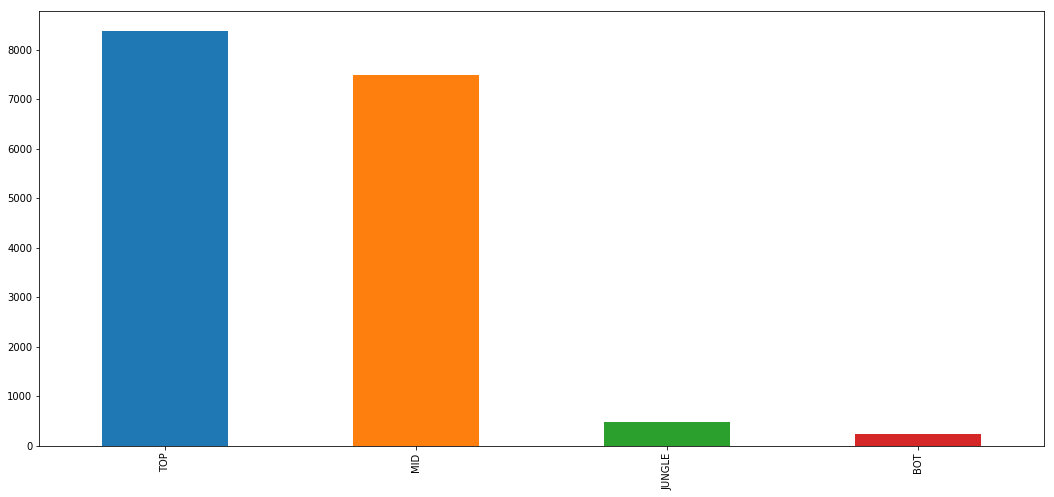

In [26]:
# 탑 미드를 제외한 포지션 존재 유무를 시각화

yasuo_position = yasuo_game_df[yasuo_game_df['championid'] == 157]['position'].value_counts()
plt.figure(figsize=(18, 8))
yasuo_position.plot(kind='bar')

In [27]:
# 정글, 봇 에서의 야스오 플레이는 비정상적인 플레이로 간주하고 제외
# 정글, 봇 플레이를 제외하기 위해 탑 미드로 플레이한 야스오가 존재한 매치의 id 리스트를 생성
only_yasuo_df = yasuo_game_df[yasuo_game_df['championid'] == 157]
yasuo_tm_list = only_yasuo_df[only_yasuo_df['position'].isin(['TOP', 'MID'])]['matchid'].unique().tolist()
yasuo_tm_list[:5]

[11, 15, 16, 21, 32]

In [28]:
# 정글, 봇에서 플레이한 야스오의 매치 데이터를 제외

yasuo_game_df = yasuo_game_df[yasuo_game_df['matchid'].isin(yasuo_tm_list)]
only_yasuo_df = yasuo_game_df[yasuo_game_df['championid'] == 157]
yasuo_game_df.shape

(158670, 20)

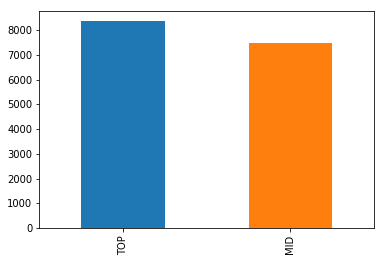

In [29]:
# 정글, 봇 제거 확인을 위한 시각화

yasuo_position = yasuo_game_df[yasuo_game_df['championid'] == 157]['position'].value_counts()
yasuo_position.plot(kind='bar')

### 3-4 시즌별, 버전별 데이터 처리

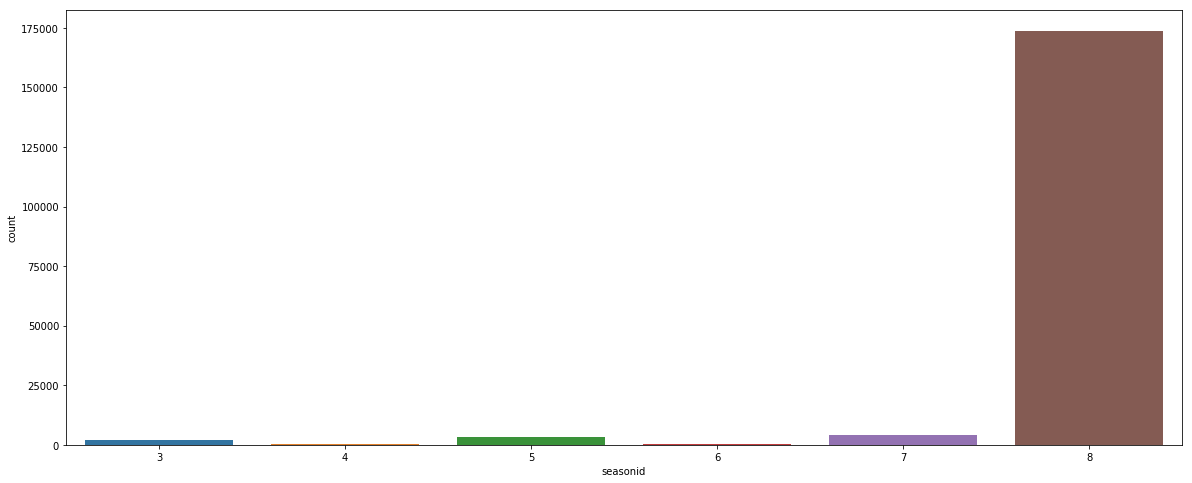

In [30]:
# 시즌 정보 시각화

plt.figure(figsize=(20, 8))
sns.countplot(x='seasonid', data=matches)

In [31]:
# 7시즌 매치만 추출

matches = matches[matches['seasonid'] == 8]

In [32]:
# 게임 버전을 단순화한 열 추가

matches['simple_version'] = matches['version'].str.rsplit(pat='.',n=2).str[0]
matches

,id,gameid,platformid,queueid,seasonid,duration,creation,version,simple_version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,7.10
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675,7.10
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675,7.10
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675,7.10
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675,7.10
5,15,3187129136,EUW1,420,8,1593,1495044303031,7.10.187.9675,7.10
6,16,3187112816,EUW1,420,8,1589,1495042306859,7.10.187.9675,7.10
7,17,3186838875,EUW1,420,8,1664,1495026635492,7.10.187.9675,7.10
8,18,3186843487,EUW1,420,8,1875,1495024225924,7.10.187.9675,7.10
9,19,3184212544,EUW1,420,8,1541,1494859155283,7.9.186.8155,7.9


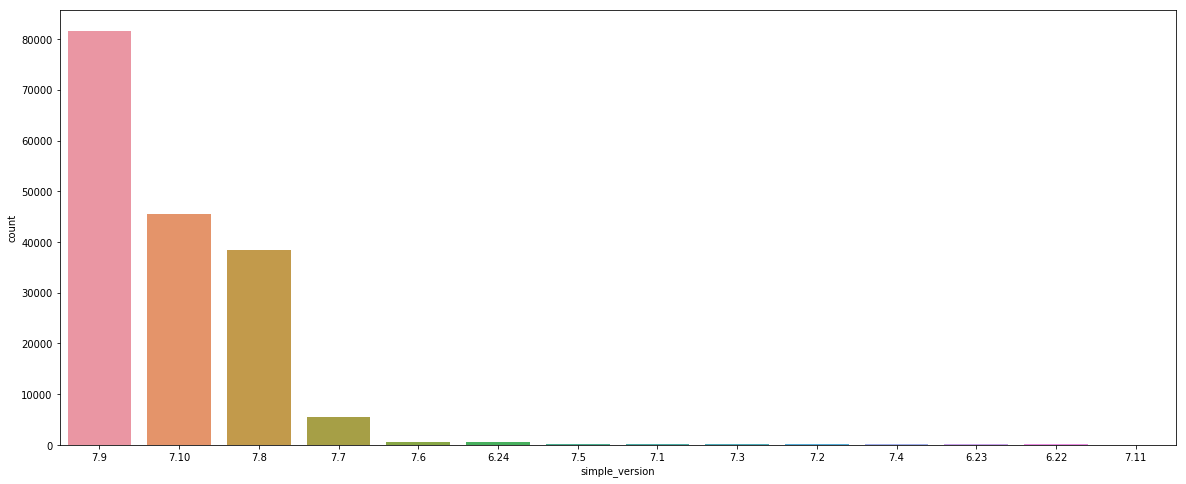

In [33]:
# 버전 정보 시각화

plt.figure(figsize=(20, 8))
sns.countplot(x='simple_version',data=matches, order=matches['simple_version'].value_counts().index)

### 3-5 조합 시너지 열 생성

In [34]:
# 야스오의 궁극기 발동을 돕는 챔피언 리스트 생성
'''
airborne_champs = ['Tristana', 'Singed', 'Thresh','Lee Sin', 'Ornn', 'Kayn', 'Draven', 'Hecarim', 'Fizz', 'Maokai', 'Urgot', 'Galio',
                   'Gnar', 'Azir', 'Riven', 'ChoGath', 'Taliyah', 'Alistar', 'Xin Zhao', 'Volibear', 'Sejuani', 'Blitzcrank', 'Rammus',
                   'Trundle', 'Quinn', 'Nami', 'Swain', 'Syndra', 'Rakan', 'Braum', 'Nautilus', 'Darius', 'Janna', 'Vayne', 'Ziggs',
                   'Kled', 'Wukong', 'Kalista', 'Vi', 'Lulu', 'Diana', 'Aurelion Sol', 'Zyra', 'Orianna', 'RekSai', 'Sion', 'Camille',
                   'Malphite', 'Jarvan IV', 'Zac', 'Gragas']
'''

"\nairborne_champs = ['Tristana', 'Singed', 'Thresh','Lee Sin', 'Ornn', 'Kayn', 'Draven', 'Hecarim', 'Fizz', 'Maokai', 'Urgot', 'Galio',\n                   'Gnar', 'Azir', 'Riven', 'ChoGath', 'Taliyah', 'Alistar', 'Xin Zhao', 'Volibear', 'Sejuani', 'Blitzcrank', 'Rammus',\n                   'Trundle', 'Quinn', 'Nami', 'Swain', 'Syndra', 'Rakan', 'Braum', 'Nautilus', 'Darius', 'Janna', 'Vayne', 'Ziggs',\n                   'Kled', 'Wukong', 'Kalista', 'Vi', 'Lulu', 'Diana', 'Aurelion Sol', 'Zyra', 'Orianna', 'RekSai', 'Sion', 'Camille',\n                   'Malphite', 'Jarvan IV', 'Zac', 'Gragas']\n"

In [35]:
# 야스오의 궁극기 발동을 돕는 챔피언 리스트 생성

airborne_champs = ['Thresh','Lee Sin', 'Ornn', 'Hecarim', 'Maokai',
                   'Gnar', 'Azir', 'Riven', 'ChoGath', 'Alistar', 'Xin Zhao'
                   'Nami', 'Syndra', 'Rakan', 'Braum', 'Nautilus', 'Ziggs',
                   'Wukong', 'Kalista', 'Vi', 'Lulu', 'Diana', 'Aurelion Sol', 'Orianna', 'RekSai', 'Sion',
                   'Malphite', 'Jarvan IV', 'Zac', 'Gragas']

In [36]:
# 팀 내의 에어본 스킬 보유 챔피언 수를 반환하는 함수

def airborne(row):
    l = []
    for n, p_num in enumerate(row['player']):
        if p_num <= 5:
            l.append(sum(yasuo_game_df.iloc[10*n:10*n+5,-1].isin(airborne_champs)))
        else:
            l.append(sum(yasuo_game_df.iloc[10*n+5:10*(n+1),-1].isin(airborne_champs)))
    only_yasuo_df['airborne'] = l

In [37]:
airborne(only_yasuo_df)

C:\Users\Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [38]:
only_yasuo_df

,id,matchid,player,championid,position,win,kills,deaths,assists,largestmultikill,...,triplekills,quadrakills,pentakills,totdmgtochamp,totdmgtaken,goldearned,totminionskilled,firstblood,name,airborne
2,21,11,3,157,MID,0.0,1.0,7.0,4.0,1.0,...,0.0,0.0,0.0,5909.0,15955.0,9083.0,114.0,1.0,Yasuo,1
19,68,15,10,157,MID,0.0,5.0,7.0,3.0,2.0,...,0.0,0.0,0.0,13565.0,18358.0,9309.0,165.0,0.0,Yasuo,2
22,71,16,3,157,TOP,0.0,6.0,7.0,5.0,2.0,...,0.0,0.0,0.0,15095.0,20570.0,10245.0,136.0,0.0,Yasuo,0
30,119,21,1,157,TOP,0.0,8.0,7.0,8.0,2.0,...,0.0,0.0,0.0,14940.0,19989.0,10966.0,162.0,0.0,Yasuo,1
46,235,32,7,157,TOP,0.0,1.0,5.0,0.0,1.0,...,0.0,0.0,0.0,8626.0,13681.0,8411.0,185.0,0.0,Yasuo,0
52,281,37,3,157,TOP,1.0,5.0,4.0,4.0,1.0,...,0.0,0.0,0.0,13819.0,11497.0,10307.0,137.0,0.0,Yasuo,1
67,336,42,8,157,TOP,1.0,10.0,12.0,8.0,1.0,...,0.0,0.0,0.0,29281.0,33647.0,15627.0,219.0,0.0,Yasuo,2
73,422,51,4,157,MID,1.0,11.0,4.0,5.0,4.0,...,1.0,1.0,0.0,17940.0,14627.0,12763.0,171.0,0.0,Yasuo,1
84,533,62,5,157,MID,0.0,1.0,6.0,0.0,1.0,...,0.0,0.0,0.0,4187.0,12717.0,5990.0,122.0,0.0,Yasuo,0
98,607,69,9,157,TOP,1.0,5.0,10.0,9.0,2.0,...,0.0,0.0,0.0,17046.0,28815.0,14075.0,222.0,0.0,Yasuo,0


### 3-6 kda, 분당 획득 골드, 분당 cs, 분당 가한 데미지 획득 열 생성

In [39]:
# kda 열 생성

func = lambda x: round((x['kills'] + x['assists']) / x['deaths'], 2) if x['deaths'] != 0 else round((x['kills'] + x['assists']) * 1.2, 2)
only_yasuo_df['kda'] = only_yasuo_df.apply(func, axis=1)
only_yasuo_df.head()

C:\Users\Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,matchid,player,championid,position,win,kills,deaths,assists,largestmultikill,...,quadrakills,pentakills,totdmgtochamp,totdmgtaken,goldearned,totminionskilled,firstblood,name,airborne,kda
2,21,11,3,157,MID,0.0,1.0,7.0,4.0,1.0,...,0.0,0.0,5909.0,15955.0,9083.0,114.0,1.0,Yasuo,1,0.71
19,68,15,10,157,MID,0.0,5.0,7.0,3.0,2.0,...,0.0,0.0,13565.0,18358.0,9309.0,165.0,0.0,Yasuo,2,1.14
22,71,16,3,157,TOP,0.0,6.0,7.0,5.0,2.0,...,0.0,0.0,15095.0,20570.0,10245.0,136.0,0.0,Yasuo,0,1.57
30,119,21,1,157,TOP,0.0,8.0,7.0,8.0,2.0,...,0.0,0.0,14940.0,19989.0,10966.0,162.0,0.0,Yasuo,1,2.29
46,235,32,7,157,TOP,0.0,1.0,5.0,0.0,1.0,...,0.0,0.0,8626.0,13681.0,8411.0,185.0,0.0,Yasuo,0,0.20


In [40]:
# only_yasuo_df 에 matches 병합

only_yasuo_df = pd.merge(only_yasuo_df, matches, how='left', left_on='matchid', right_on='id', suffixes=('', '_y'))
only_yasuo_df.columns

Index(['id', 'matchid', 'player', 'championid', 'position', 'win', 'kills',
       'deaths', 'assists', 'largestmultikill', 'doublekills', 'triplekills',
       'quadrakills', 'pentakills', 'totdmgtochamp', 'totdmgtaken',
       'goldearned', 'totminionskilled', 'firstblood', 'name', 'airborne',
       'kda', 'id_y', 'gameid', 'platformid', 'queueid', 'seasonid',
       'duration', 'creation', 'version', 'simple_version'],
      dtype='object')

In [41]:
only_yasuo_df.drop(columns=['id_y'], inplace=True)

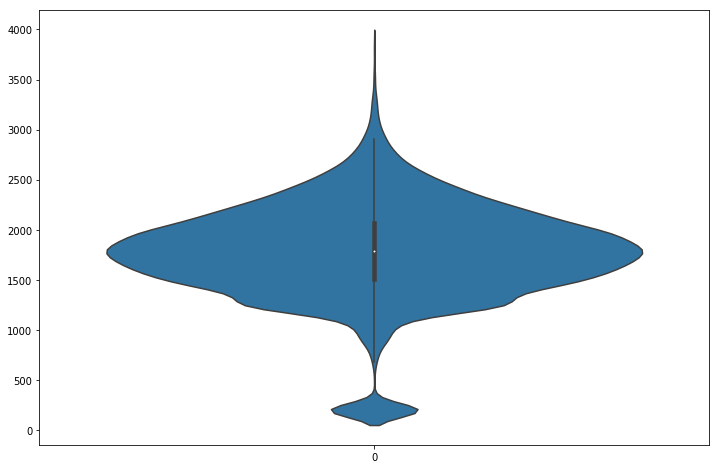

In [42]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=only_yasuo_df['duration'])

In [43]:
# 게임 시간이 15분 미만인 게임 제외

only_yasuo_df = only_yasuo_df[only_yasuo_df['duration'] >= 900]

In [44]:
# 분당 골드 획득 열 생성
only_yasuo_df['goldpermin'] = only_yasuo_df['goldearned'] / only_yasuo_df['duration'] * 60

# 분당 획득 cs 열 생성
only_yasuo_df['cspermin'] = only_yasuo_df['totminionskilled'] / only_yasuo_df['duration'] * 60

# 분당 가한 데미지 열 생성
only_yasuo_df['dmgpermin'] = only_yasuo_df['totdmgtochamp'] / only_yasuo_df['duration'] * 60

only_yasuo_df[['goldpermin', 'cspermin', 'dmgpermin']].head()

,goldpermin,cspermin,dmgpermin
0,321.901949,4.040165,209.415239
1,350.621469,6.214689,510.922787
2,386.847074,5.135305,569.981120
3,378.355377,5.589419,515.468660
4,345.894448,7.607951,354.736121


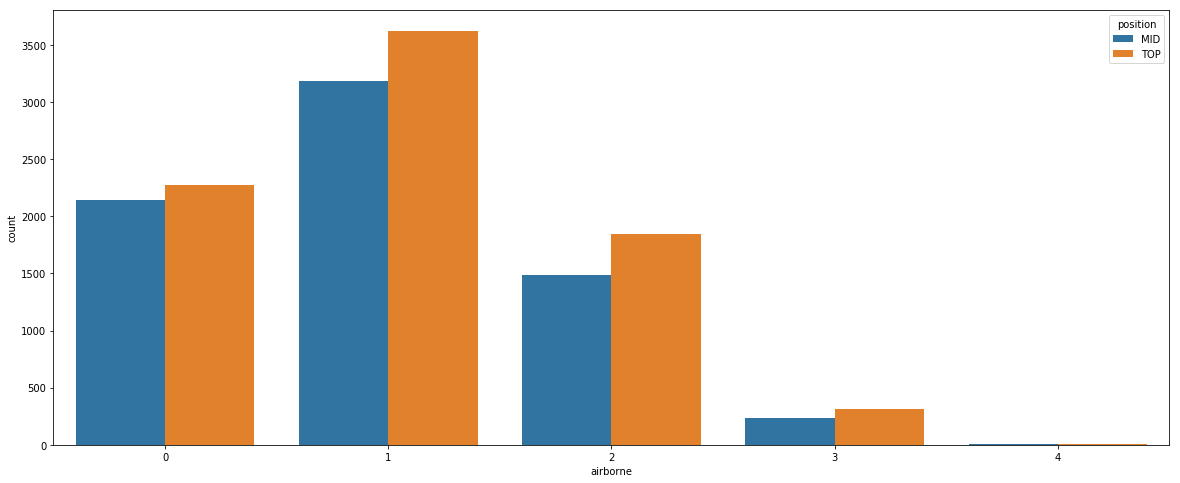

In [45]:
# 게임에 포함된 에어본 보유 챔피언 수 시각화

plt.figure(figsize=(20, 8))
sns.countplot(x='airborne', hue='position', data=only_yasuo_df)

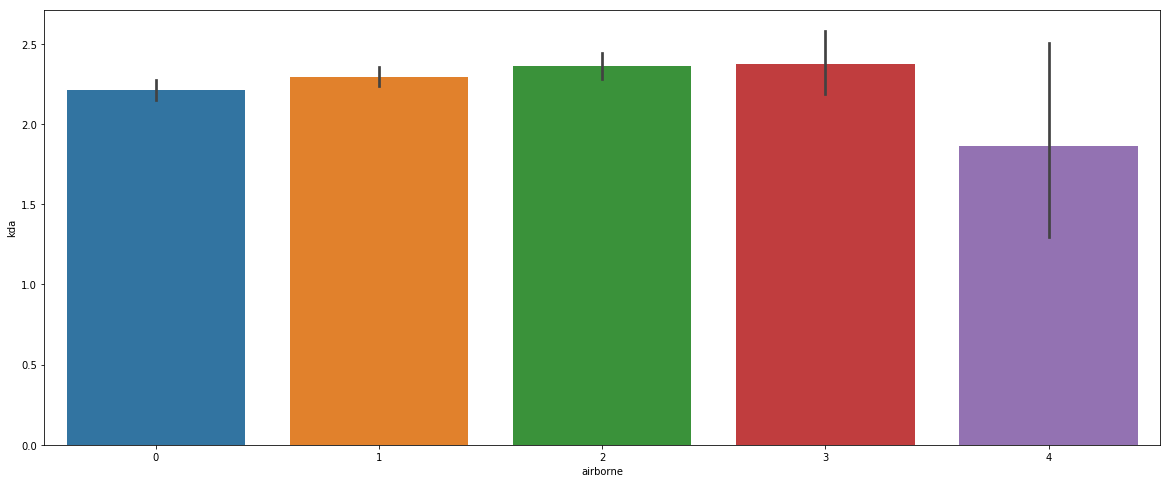

In [46]:
plt.figure(figsize=(20, 8))
sns.barplot(x='airborne', y='kda', data=only_yasuo_df)

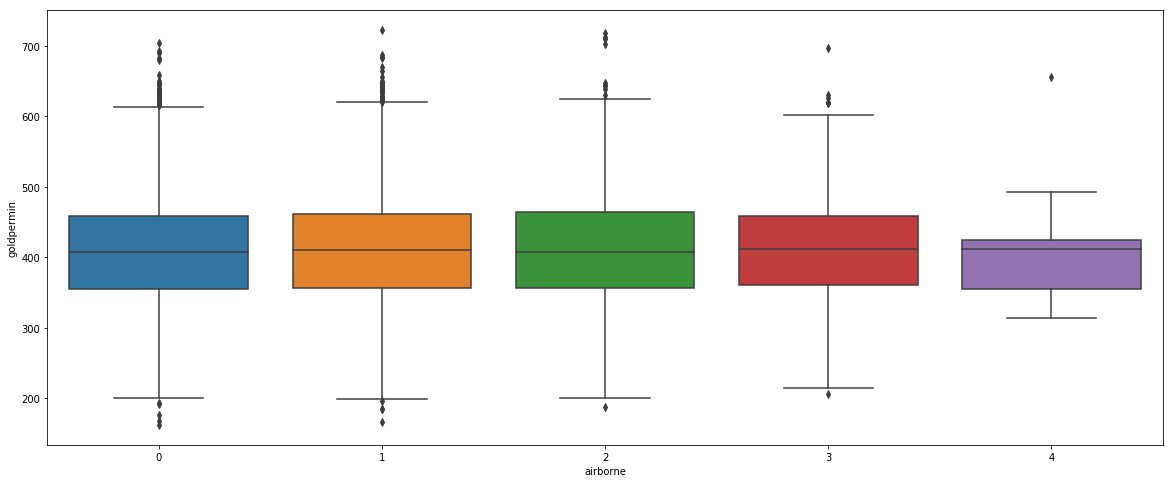

In [47]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='airborne', y='goldpermin', data=only_yasuo_df)

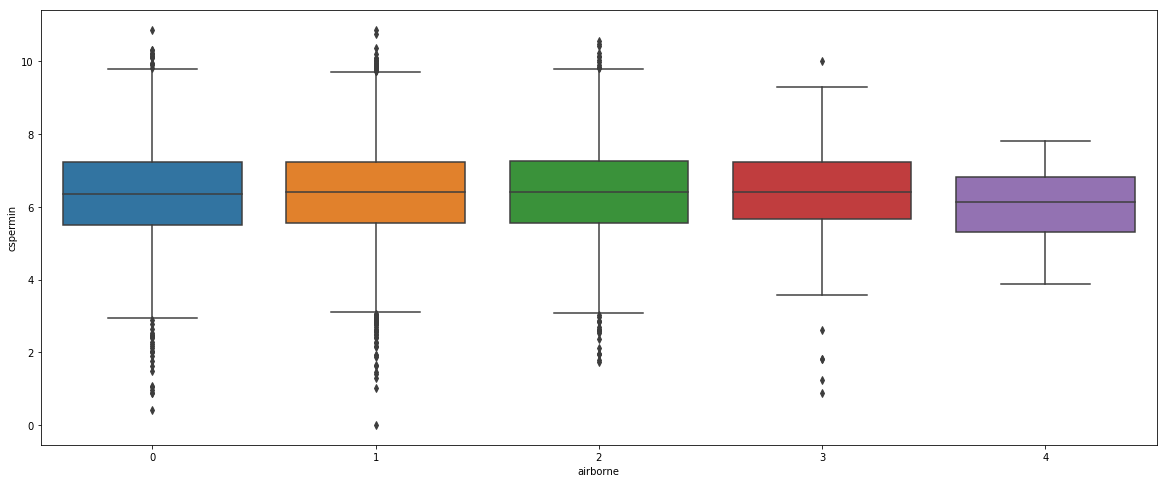

In [48]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='airborne', y='cspermin', data=only_yasuo_df)

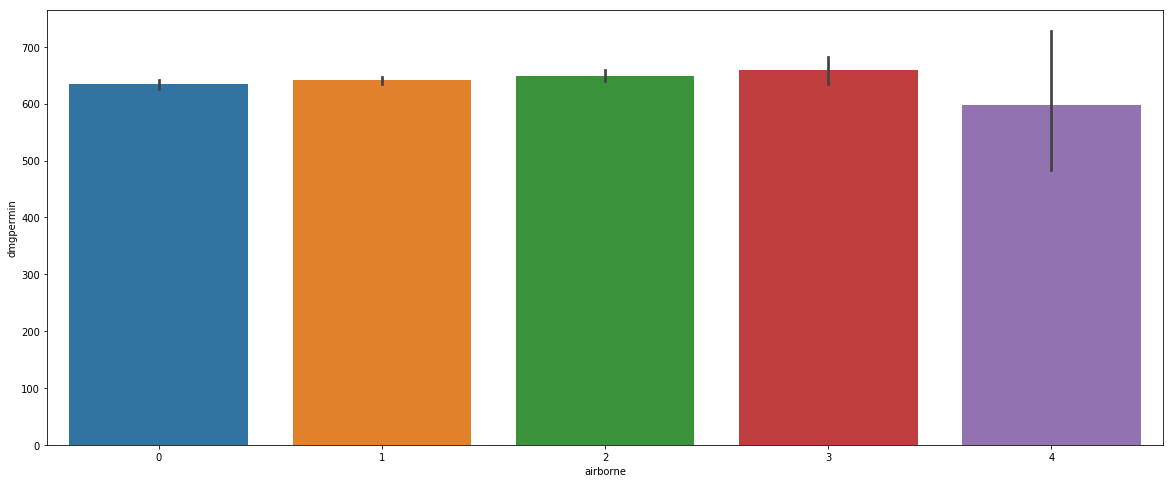

In [49]:
plt.figure(figsize=(20, 8))
sns.barplot(x='airborne', y='dmgpermin', data=only_yasuo_df)

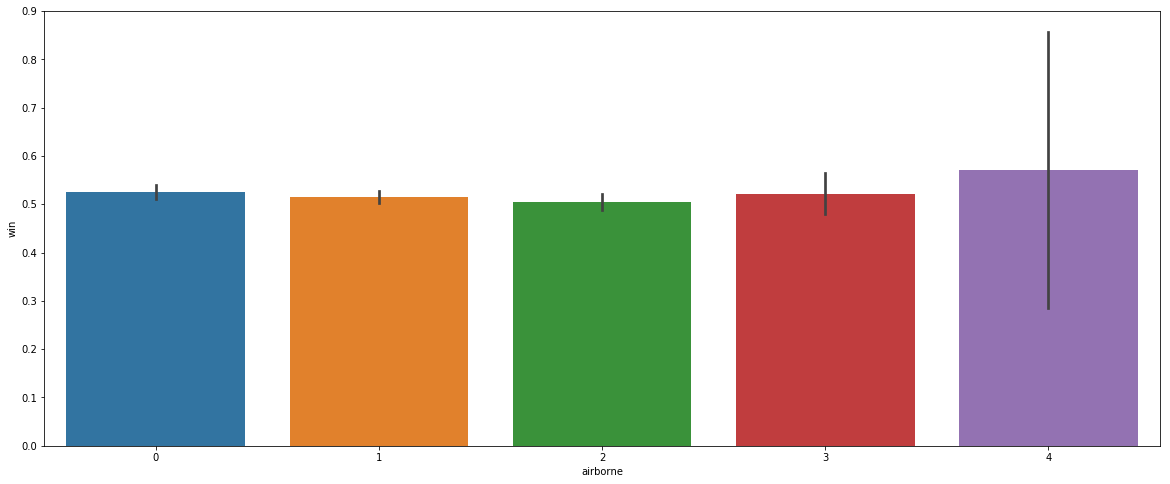

In [50]:
plt.figure(figsize=(20, 8))
sns.barplot(x='airborne', y='win', data=only_yasuo_df)

In [51]:
yasuo_game_df.to_csv('../data/yasuo_game.csv', index=False)
only_yasuo_df.to_csv('../data/yasuo_only.csv', index=False)